<font size=7 color ="#5499C7" >AI CA2 - Hidden Markov Model</font>
- <font size=5>__Name__ : Kourosh Sajjadi</font>
- <font size=5>__UID__  : 810100587</font>

<p align="justify"><font size="5" color="#A9CCE3"><b>Section 0: Basic Concepts and Problem Goals</b></font><br></p>

<p allign="justify">
In this project, we aim to develop a sophisticated speech recognition model by utilizing Hidden Markov Models (HMM). Provided with a dataset containing voice recordings from various individuals pronouncing a sequence of numbers, our primary goal is to accurately associate each voice recording with the correct speaker or the correct digit. This endeavor seeks to establish a reliable method for speaker identification, leveraging the capabilities of HMM to analyze, learn, and predict based on the unique characteristics embedded within each audio sample.
</p>


### <p align="justify"><font size="5" color="#A9CCE3"><b>Section 1: Preprocessing and Feature Extraction</b></font></p>

#### <p align="justify"><font size="5" color="#d62b5b">1. Is Data Segmentation Beneficial for This Dataset? Why?</font></p>
<p align="justify"> Considering our specific goal of linking a single number to an individual, data segmentation may not be crucial for enhancing our model's accuracy. The dataset is inherently focused, concentrating on the pronunciation of individual numbers, which simplifies the task at hand but on the other hand on the from scrach part of our project which we don't do any simple preprocessing it proved to be very usefull for extending the train part of our model.</p>

#### <p align="justify"><font size="5" color="#d62b5b">2. Research about each of the characteristics and explain the relations between them.</font></p>

<p align="justify"> <b>Mel-Spectrogram:</b> A mel-spectrogram is a type of spectrogram where the frequencies are converted to the mel scale, designed to mimic the human ear's non-linear perception of sound by scaling frequencies in a manner more aligned with how humans differentiate pitch.</p>

<p align="justify"> <b>Mel-Frequency Cepstral Coefficients (MFCCs):</b> MFCCs are coefficients that constitute an MFC. They derive from the real cepstral representation of a windowed short-time signal, which comes from the signal's fast Fourier transform.</p>

<p align="justify"> <b>Zero Crossing Rate (ZCR):</b> The Zero Crossing Rate measures how frequently the signal changes from positive to negative or vice versa. This feature, while simple, effectively captures the texture of an audio signal.</p>

<p align="justify"> <b>Chroma Features:</b> Chroma features offer a powerful approach for music audio analysis by projecting the entire spectrum onto 12 bins, each corresponding to the 12 different semitones (or chroma) of the musical octave.</p>

<p align="justify"> <b>Relations Between Them:</b> Both mel-spectrograms and MFCCs make use of the mel scale, tailored to reflect human auditory perception. Chroma features capture the harmonic and melodic components of music, a contrast to the mel-spectrograms and MFCCs which provide a detailed representation of the sound spectrum over time. The Zero Crossing Rate brings a different perspective by offering insights into the texture and, potentially, the rhythm of a sound, distinguishing itself from the pitch-focused information provided by the other features. Despite some overlap, each feature highlights unique aspects of the sound, making them complementary when used together in machine learning models.</p>


In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import random
from hmmlearn import hmm
import numpy as np
from collections import defaultdict
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from math import floor
from sklearn.preprocessing import normalize

In [2]:
recordingsDir = './recordings'

In [3]:
speakerMfccs = {}

for filename in os.listdir(recordingsDir):
    if filename.endswith('.wav'):
        filePath = os.path.join(recordingsDir, filename)
        audio, sampleRate = librosa.load(filePath)
        audioTrimmed, _ = librosa.effects.trim(audio, top_db=20)
        mfcc = librosa.feature.mfcc(y=audioTrimmed, sr=sampleRate, n_mfcc=13)
        speakerMfccs[filename] = (mfcc, sampleRate)

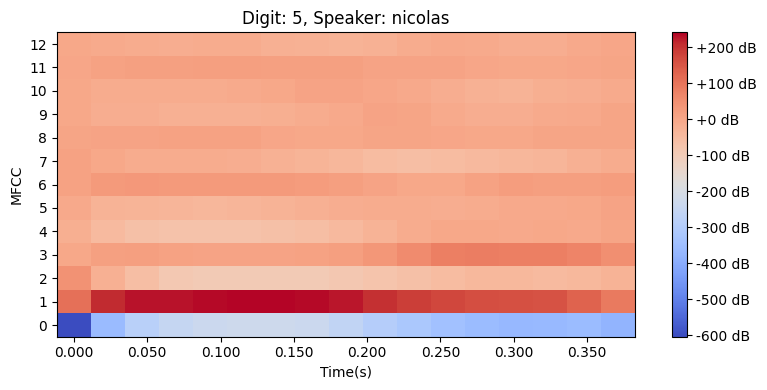

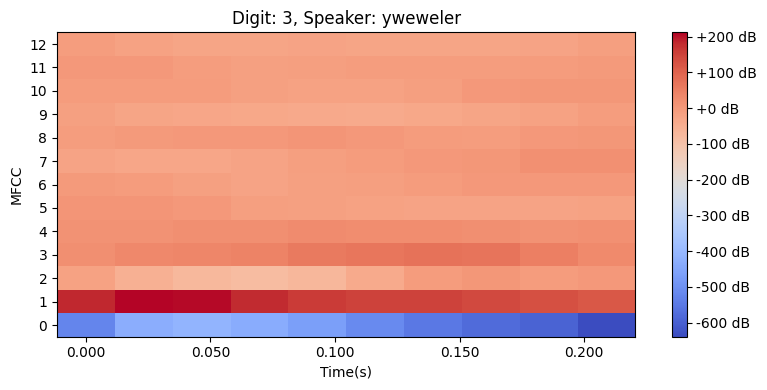

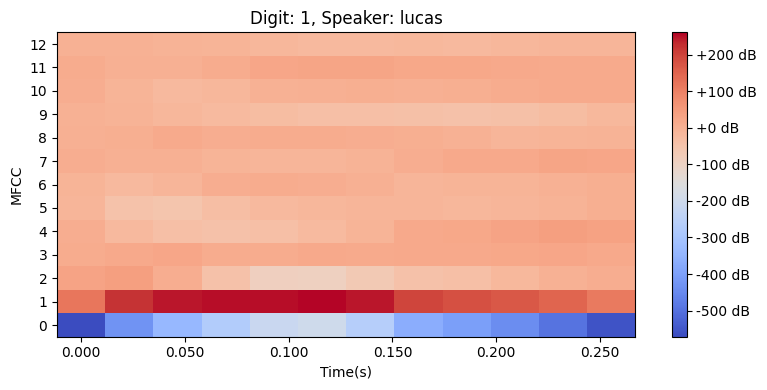

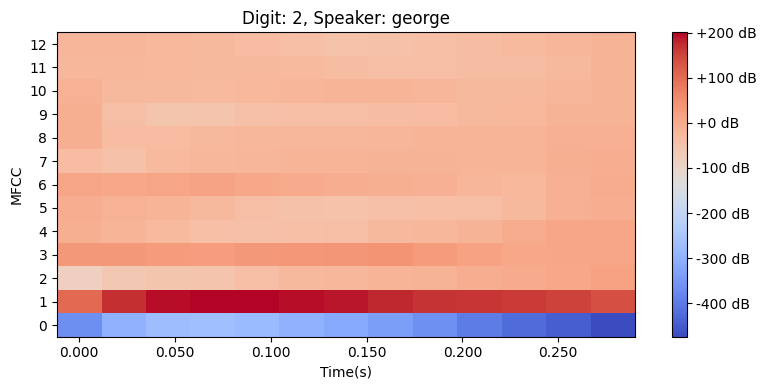

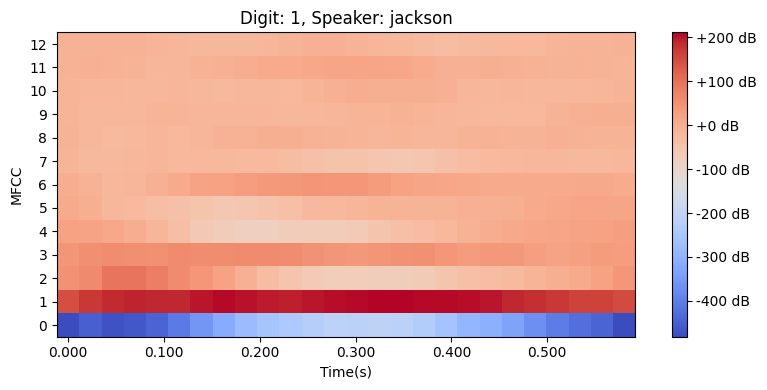

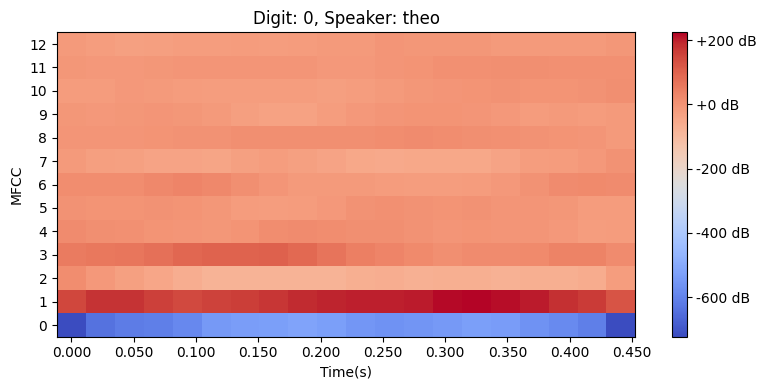

In [4]:
def plotMfcc(mfccs, sr, filename):
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time(s)')
    plt.ylabel('MFCC')
    plt.yticks(range(0, 13))
    parts = filename.split('_')
    if len(parts) >= 3:
        title = f"Digit: {parts[0]}, Speaker: {parts[1]}"
    else:
        title = filename
    plt.title(title)
    plt.tight_layout()
    plt.show()

plottedSpeakers = set()

for filename, (mfcc, sr) in speakerMfccs.items():
    _, speakerName, _ = filename.rsplit('_', 2)
    if speakerName not in plottedSpeakers:
        plotMfcc(mfcc, sr, filename)
        plottedSpeakers.add(speakerName)

<div align="justify">

### <font size="5" color="#d62b5b">3. Examine the Robustness and Sensitivity of MFCCs to Variations in Audio Signals</font>

- **Robustness:** MFCCs harness the mel scale to approximate the human ear's response to different frequencies, showcasing robustness to variations that minimally impact human perception. Their resilience against additive noise, especially when uncorrelated with the primary signal, and their stability across different speakers highlight their utility in speaker-independent speech recognition tasks.

- **Sensitivity:** Despite their robustness, MFCCs are susceptible to the quality of audio signals. Distortions, pronounced noise, and low bit rates can compromise MFCC accuracy. Environmental factors like background noise, room acoustics, and microphone quality also affect the extracted features. Moreover, the speech rate and the speaker's emotional state can alter the speech signal's temporal dynamics, to which MFCCs are sensitive.

### <font size="5" color="#d62b5b">4. Are There Specific Cases Where MFCC Coefficients Exhibit Lower Effectiveness?</font>

Designed to emulate the human ear's response to frequency variations, MFCCs may underperform when analyzing non-speech sounds, such as environmental noises or musical instruments. These sounds possess spectral characteristics that the mel scale does not optimally capture. Additionally, while adept at identifying spectral properties of speech, MFCCs are less capable of discerning prosodic elements—like pitch, rhythm, and stress—that are vital for recognizing speech emotions.

### <font size="5" color="#d62b5b">5. Why Do the Frames Used in the Calculation of MFCCs Need to Overlap Each Other?</font>

Overlapping frames in MFCC calculation are essential for capturing the detailed temporal relationships between frames, preserving temporal information, and ensuring a seamless, comprehensive analysis of the audio signal. This methodology facilitates a more accurate representation of the speech dynamics.

### <font size="5" color="#d62b5b">6. Why Is It That in Most Audio-Related Projects, Only the First 12 or 13 MFCC Coefficients Are Used?</font>

The preference for the first 12 or 13 MFCCs stems from:

- **Dimensionality Reduction:** Employing a subset of coefficients reduces the complexity and computational demand, enhancing processing efficiency.
- **Efficiency of DCT:** The Discrete Cosine Transform (DCT), crucial in MFCC generation, naturally concentrates significant signal information within the first few coefficients, thereby optimizing the representation of the audio signal.

</div>


<div align="justify">

### <font size="5" color="#A9CCE3"><b>Section 2: HMM Introduction</b></font>

#### <font size="5" color="#d62b5b">1. Explain what is meant by States and Observations? In this exercise, what are the States and how is Observation obtained?</font>
- **States:** In Hidden Markov Models (HMMs), states signify the distinct conditions or configurations that the model can inhabit at any given moment. These states, being internal, are not directly observable, leading to their characterization as "hidden". In our specific project context, the states could represent either numerical values or the identity of individuals articulating these numbers. However, it's crucial to note that their significance is confined to their functional role within the model's framework.

- **Observations:** Observations constitute the data points or signals that can be directly perceived or measured. Within the ambit of an HMM, observations emerge from the states based on specific probability distributions, termed emission probabilities. In the scope of our project, observations are generated from audio recordings through the extraction of coefficients from these recordings.

#### <font size="5" color="#d62b5b">2. HMM models can be classified based on the degree of dependency between the hidden states. The model you will learn to implement in this exercise is a First-Order HMM. Investigate the reason behind its naming and its characteristics, and explain how it differs from other models in this classification.</font>
- The designation "First-Order HMM" derives from the model's foundational assumption that the likelihood of transitioning to a subsequent state is contingent solely upon the current state. This "first-order" nomenclature reflects the conditional nature of each state's probability on merely its immediate predecessor. This model stands in contrast to higher-order HMMs, where the probability of a forthcoming state may depend on a sequence of two or more preceding states, allowing for a broader temporal context in the state transition dynamics.

#### <font size="5" color="#d62b5b">3. Research HMM and explain what phenomena this model is suitable for examining and analyzing. Explain the reasoning behind this.</font>
- Hidden Markov Models excel in the analysis of sequential data, particularly where the underlying processes remain obscure or indirectly observable. Their robustness in modeling the transitions between hidden states that give rise to observable events makes them particularly adept for scenarios where sequence and timing are paramount.

  - **Applications include:**
    - Speech recognition: Apt for modeling the sequence of spoken phonemes due to the temporal structure of speech.
    - Handwriting recognition: Suitable for analyzing sequential strokes, facilitating the deciphering of handwritten text.
    - Gene prediction: Effective in identifying gene sequences within DNA, leveraging the sequential nature of genetic material.

#### <font size="5" color="#d62b5b">4. The HMM model, like any other model, has advantages and disadvantages that make it unique. Examine the advantages and disadvantages of this model and briefly explain each.</font>
- **Advantages:**
  - **Efficient Learning Algorithms:** HMMs are designed to be trained directly on raw sequential data, offering a streamlined learning process.
  - **Variable Length Input Handling:** Their inherent flexibility allows for the management of input sequences of varying lengths, accommodating a wide range of data scenarios.
  - **Robustness:** The model's design enables it to perform reliably in conditions laden with noise and uncertainty, such as those encountered in speech recognition environments.

- **Disadvantages:**
  - **Complex Parameter Space:** The potential complexity arising from HMMs' extensive parameter sets can complicate the model's structure and interpretability.
  - **Short-term Memory:** The Markovian assumption restricts HMMs to short-term memory capabilities, potentially limiting their efficacy in capturing long-term dependencies within the data.

#### <font size="5" color="#d62b5b">5. There are various types of HMM models. Research them and briefly examine a few.</font>
- **Different Types of HMMs:**

  1. **Discrete HMM (DHMM):** Tailored for scenarios involving discrete hidden states and observable outputs, making it ideal for analyses of categorical data.

  2. **Continuous HMM (CHMM):** Designed for contexts where observable outputs manifest as continuous values, rendering it suitable for continuous data representation.

  3. **Left-Right HMM:** Characterized by unidirectional (left-to-right) transitions, enhancing its applicability in temporal sequence modeling, such as in speech recognition.
  
  4. **Factorial HMM (FHMM):** Enables the modeling of multiple interdependent observation sequences, facilitating the exploration of correlations among diverse data streams.

</div>


<font size="5" color="#A9CCE3"><b>Section 3: Implementing Our Problem Using Libraries</b></font>

In [5]:
recordingsByDigit = defaultdict(list)
recordingsBySpeaker = defaultdict(list)

for filename, (mfcc, sr) in speakerMfccs.items():
    splitedFilename = filename.split('_')
    digit = splitedFilename[0]
    speaker = splitedFilename[1]
    recordingsByDigit[digit].append((filename, (mfcc, sr)))
    recordingsBySpeaker[speaker].append((filename, (mfcc, sr)))

train_split_ratio = 0.8
trainSpeakerMFCC = {}
testSpeakerMFCC = {}

for _, recordings in recordingsByDigit.items():
    random.shuffle(recordings)
    numTrain = int(len(recordings) * train_split_ratio)

    trainRecordings = recordings[:numTrain]
    testRcordings = recordings[numTrain:]

    for filename, data in trainRecordings:
        trainSpeakerMFCC[filename] = data
    for filename, data in testRcordings:
        testSpeakerMFCC[filename] = data

print(f"Training set size: {len(trainSpeakerMFCC)}")
print(f"Test set size: {len(testSpeakerMFCC)}")

Training set size: 2400
Test set size: 600


In [6]:
numStates = 9

digitModels = {}
speakerModels = {}
mfccsBySpeaker = defaultdict(list)

for filename, (mfcc, sr) in trainSpeakerMFCC.items():
    _, speakerName, _ = filename.rsplit('_', 2)
    mfccsBySpeaker[speakerName].append((mfcc, sr))

for digit in range(10):
    model = hmm.GaussianHMM(n_components=numStates, covariance_type="diag", n_iter=100)
    X = np.array([]).reshape(-1, 13)
    lengths = []

    for speakerName, (mfcc, sr) in trainSpeakerMFCC.items():
        if speakerName.startswith(str(digit)):
            if X.size == 0:
                X = mfcc.T
            else:
                X = np.vstack((X, mfcc.T))
            lengths.append(mfcc.shape[1])

    model.fit(X, lengths)
    digitModels[digit] = model

for speakerName, mfccs_sr_list in mfccsBySpeaker.items():
    model = hmm.GaussianHMM(n_components=numStates, covariance_type="diag", n_iter=100)
    X = np.array([]).reshape(-1, 13)
    lengths = []
    
    for mfcc, sr in mfccs_sr_list:
        if X.size == 0:
            X = mfcc.T
        else:
            X = np.vstack((X, mfcc.T))
        lengths.append(mfcc.shape[1])

    model.fit(X, lengths)
    speakerModels[speakerName] = model

<div align="justify">

### <font size="5" color="#A9CCE3"><b>Section 3.1: Evaluating Our Results</b></font>

#### <font size="5" color="#d62b5b">1. Investigating each of the above criteria and explaining how to calculate each.</font>

- **Accuracy:** Measures the proportion of correctly classified cases from the total number of objects in the dataset. To compute the metric, divide the number of correct predictions by the total number of predictions made. Though straightforward to interpret, it estimates overall model quality without considering class balance or the cost of different errors.

$$
Accuracy = \frac{\text{Correct Predictions}}{\text{All Predictions}}
$$

- **Precision:** In multi-class classification, precision is the fraction of instances correctly classified as belonging to a specific class out of all instances predicted to belong to that class.

$$
Precision_{\text{Class A}} = \frac{TP_{\text{Class A}}}{TP_{\text{Class A}} + FP_{\text{Class A}}}
$$

- Where:
  - $TP_{\text{Class A}}$: Number of instances correctly predicted as Class "A"
  - $FP_{\text{Class A}}$: Number of instances wrongly predicted as Class "A"

- **Recall:** In multi-class classification, recall is the fraction of instances in a class correctly identified out of all instances in that class.

$$
Recall_{\text{Class A}} = \frac{TP_{\text{Class A}}}{TP_{\text{Class A}} + FN_{\text{Class A}}}
$$

- Where:
  - $FN_{\text{Class A}}$: Number of instances in Class "A" that were incorrectly predicted as another class

- **F1-Score:** A metric that considers both precision and recall, defined as follows:

$$
F1 \text{ Score}_{\text{Class A}} = 2 * \frac{Precision_{\text{Class A}} * Recall_{\text{Class A}}}{Precision_{\text{Class A}} + Recall_{\text{Class A}}}
$$

- The F1 Score is the harmonic mean of precision and recall, offering a more nuanced measure than accuracy, as it requires both precision and recall to be high to achieve a high score.

#### <font size="5" color="#d62b5b">2/3. Is calculating the mentioned criteria challenging for the project that is multi-class? If yes, what solution do you have for it?</font>

- Yes, evaluating performance metrics in a multi-class classification context can be intricate, particularly due to the challenges posed by assessing performance across multiple classes. Traditional metrics like accuracy may not fully elucidate performance, especially where there is an imbalance in class distribution. Approaches such as macro-averaging, micro-averaging, and weighted averaging are devised to navigate these complexities.

- **Macro-averaging:** Computed as a simple arithmetic mean of the metrics calculated per class.

- **Micro-averaging:** Involves computing metrics based on the aggregation of contributions from all classes:

$$
\text{Micro Precision} = \frac{\text{Net TP}}{\text{Net TP} + \text{Net FP}}
$$

$$
\text{Micro Recall} = \frac{\text{Net TP}}{\text{Net TP} + \text{Net FN}}
$$

- It's notable that:

$$
\text{Micro Precision} = \text{Micro Recall} = \text{Micro F1} = \text{Accuracy}
$$

- **Weighted-averaging:** Calculated as a weighted arithmetic mean of the metrics per class, with weights corresponding to the prevalence of each class in the dataset.

#### <font size="5" color="#d62b5b">4. Explain the difference between Recall and Precision and explain why each one is not sufficient for evaluating the model on its own.</font>

- Precision focuses on minimizing false positives but overlooks false negatives, whereas Recall emphasizes minimizing false negatives, deeming false positives less critical. For instance, in a spam detection scenario, a model that identifies only one actual spam email as spam and all others as non-spam could achieve 100% precision but would fall short in overall accuracy and recall, illustrating the necessity for a balanced evaluation that considers both metrics.

#### <font size="5" color="#d62b5b">5. The F1 Score uses the harmonic mean for averaging. Why is this important?</font>

- The use of the harmonic mean in calculating the F1 Score is crucial as it more severely penalizes extreme values compared to the arithmetic mean. This property ensures that the score reflects the balance between precision and recall, with low values in either metric resulting in a significantly lower F1 Score, thereby providing a more balanced measure of a model's performance.

</div>


In [7]:
def predictDigit(models, mfcc):
    bestScore, bestDigit = float("-inf"), None
    for digit, model in models.items():
        score = model.score(mfcc.T)
        if score > bestScore:
            bestScore, bestDigit = score, digit
    return bestDigit

def predictSpeaker(speakerModels, mfcc):
    bestScore, best_speaker = float("-inf"), None
    for speaker, model in speakerModels.items():
        score = model.score(mfcc.T)
        if score > bestScore:
            bestScore, best_speaker = score, speaker
    return best_speaker

correctPredictionsDigits = 0
correctPredictionsSpeakers = 0
totalTestSamples = len(testSpeakerMFCC)

for testFilename, (testMfcc, testSr) in testSpeakerMFCC.items():
    predictedDigit = predictDigit(digitModels, testMfcc)
    predictedSpeaker = predictSpeaker(speakerModels, testMfcc)

    actualDigit = int(testFilename.split('_')[0])
    actualSpeaker = testFilename.split('_')[1]

    if predictedDigit == actualDigit:
        correctPredictionsDigits += 1
    if predictedSpeaker == actualSpeaker:
        correctPredictionsSpeakers += 1

accuracyDigits = correctPredictionsDigits / totalTestSamples
accuracySpeakers = correctPredictionsSpeakers / totalTestSamples
print(f"\nAccuracy Digits: {accuracyDigits:.2f} ({correctPredictionsDigits}/{totalTestSamples}) Accuracy Speakers: {accuracySpeakers:.2f} ({correctPredictionsSpeakers}/{totalTestSamples})")


Accuracy Digits: 0.95 (571/600) Accuracy Speakers: 0.97 (582/600)


In [8]:
class Evaluation:
    def __init__(self, predictions, labels, class_names):
        self.predictions = predictions
        self.labels = labels
        self.class_names = class_names
        self.num_class = len(class_names)
        self.confusion_matrix = self._compute_confusion_matrix()
        self.accuracy = self._compute_accuracy()
        self.precision = self._compute_precision()
        self.recall = self._compute_recall()
        self.f1_score = self._compute_f1_score()

    def _compute_confusion_matrix(self):
        cm = np.zeros((self.num_class, self.num_class), dtype=int)
        for actual, predicted in zip(self.labels, self.predictions):
            cm[actual][predicted] += 1
        return cm

    def _compute_accuracy(self):
        correct_predictions = sum(self.confusion_matrix[i][i] for i in range(self.num_class))
        total_predictions = self.confusion_matrix.sum()
        return correct_predictions / total_predictions

    def _compute_precision(self):
        precision = []
        for i in range(self.num_class):
            column = self.confusion_matrix[:, i]
            precision.append(self.confusion_matrix[i, i] / column.sum() if column.sum() > 0 else 0)
        return np.array(precision)

    def _compute_recall(self):
        recall = []
        for i in range(self.num_class):
            row = self.confusion_matrix[i, :]
            recall.append(self.confusion_matrix[i, i] / row.sum() if row.sum() > 0 else 0)
        return np.array(recall)

    def _compute_f1_score(self):
        return 2 * (self.precision * self.recall) / (self.precision + self.recall)

    def plot_confusion_matrix(self):
        num_classes = len(self.class_names)
        cm = np.zeros((num_classes, num_classes), dtype=int)
        for true_label, prediction in zip(self.labels, self.predictions):
            cm[true_label][prediction] += 1
        
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        tick_marks = np.arange(len(self.class_names))
        plt.xticks(tick_marks, self.class_names, rotation=45)
        plt.yticks(tick_marks, self.class_names)
        
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.title('Confusion Matrix')
        plt.show()

    def report(self):
        avg_precision = self.precision.mean()
        print(f"Accuracy: {self.accuracy:.4f}")
        print(f"Precision: {avg_precision:.4f}")
        print("Class\tPrecision\tRecall\t\tF1-Score")
        for i, name in enumerate(self.class_names):
            print(f"{name}\t{self.precision[i]:.4f}\t\t{self.recall[i]:.4f}\t\t{self.f1_score[i]:.4f}")

Digit Evaluation:
Accuracy: 0.9517
Precision: 0.9544
Class	Precision	Recall		F1-Score
0	0.8889		0.9333		0.9106
1	0.9677		1.0000		0.9836
2	1.0000		0.7333		0.8462
3	0.8676		0.9833		0.9219
4	1.0000		1.0000		1.0000
5	0.9672		0.9833		0.9752
6	0.9516		0.9833		0.9672
7	0.9500		0.9500		0.9500
8	1.0000		0.9833		0.9916
9	0.9508		0.9667		0.9587


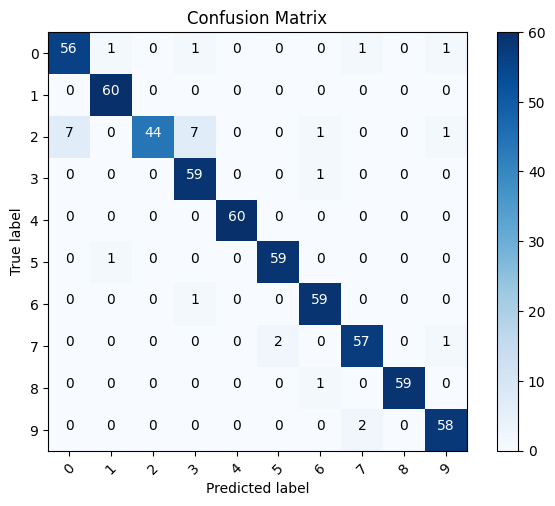


Speaker Evaluation:
Accuracy: 0.9700
Precision: 0.9705
Class	Precision	Recall		F1-Score
george	0.9717		1.0000		0.9856
jackson	0.9579		1.0000		0.9785
lucas	1.0000		1.0000		1.0000
nicolas	1.0000		1.0000		1.0000
theo	0.9789		0.8532		0.9118
yweweler	0.9143		0.9796		0.9458


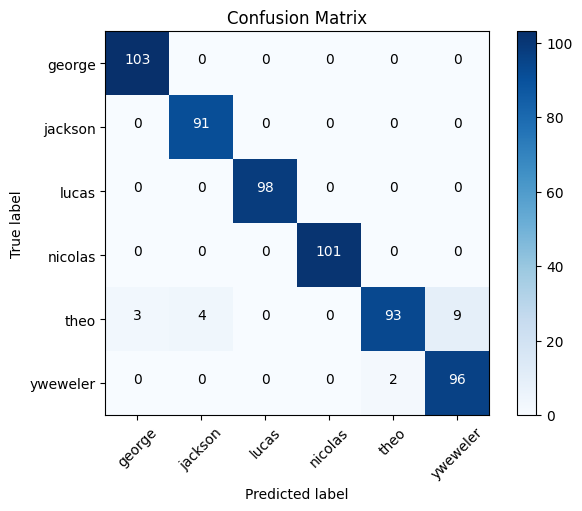

In [9]:
digitPredictions = []
digitLabels = []
speakerPredictions = []
speakerLabels = []

for testFilename, (testMfcc, testSr) in testSpeakerMFCC.items():
    predictedDigit = predictDigit(digitModels, testMfcc)
    predictedSpeaker = predictSpeaker(speakerModels, testMfcc)

    actualDigits = int(testFilename.split('_')[0])
    actualSpeaker = testFilename.split('_')[1]

    digitPredictions.append(predictedDigit)
    digitLabels.append(actualDigits)
    speakerPredictions.append(predictedSpeaker)
    speakerLabels.append(actualSpeaker)

digitClassNames = [str(i) for i in range(10)]
speakerClassNames = sorted(list(set(speakerLabels)))

speakerNameToInt = {name: i for i, name in enumerate(speakerClassNames)}
speakerPredictionsInt = [speakerNameToInt[name] for name in speakerPredictions]
speakerLabelsInt = [speakerNameToInt[name] for name in speakerLabels]

digitEval = Evaluation(digitPredictions, digitLabels, digitClassNames)
speakerEval = Evaluation(speakerPredictionsInt, speakerLabelsInt, speakerClassNames)

print("Digit Evaluation:")
digitEval.report()
digitEval.plot_confusion_matrix()

print("\nSpeaker Evaluation:")
speakerEval.report()
speakerEval.plot_confusion_matrix()

<div align="justify">

#### <font size="5" color="#d62b5b">8. Examine the Differences Between Sections 6 and 7 and Identify the Reasons for Them</font>

- The observed differences in accuracy and precision between the digit and speaker models highlight nuanced aspects of speech recognition. Specifically, the digit recognition model demonstrated higher accuracy and precision than the speaker recognition model. Moreover, the confusion matrix for digits displayed fewer misclassifications compared to that of speakers.

- Several factors contribute to these differences:

  - **Distinctness of Speech Patterns:** Digits, limited in variety and typically pronounced similarly, are easier to classify accurately. In contrast, speaker recognition grapples with diverse individual vocal characteristics, which can vary significantly, even under controlled conditions. This inherent variability in speaker voice patterns leads to more classification errors.

  - **Influence of Tone and Context:** The system might better recognize tone variations when identifying digits, as these variations are generally less pronounced. However, distinguishing between speakers requires accurately identifying subtle tonal differences, accent nuances, and individual speech idiosyncrasies, which poses a greater challenge.

  - **Data Quality and Quantity:** The quality and volume of training data for digit recognition tend to be more uniform and comprehensive, resulting in a more effective model. Speaker recognition models might underperform if the dataset lacks diversity in recording conditions, speech contexts, or features imbalanced samples among speakers.

  - **Model Complexity and Focus:** Digit recognition tasks can employ simpler models that focus on clear, distinct patterns. However, speaker recognition necessitates more complex models designed to capture subtle, nuanced differences in human speech, introducing greater potential for error, especially among closely similar voice patterns.

- These points highlight the inherent challenges in speaker recognition compared to digit recognition. Enhancing speaker recognition models demands not only advanced modeling techniques but also richer, more varied datasets that capture a broad spectrum of vocal characteristics in different contexts.

</div>


<font size="5" color="#A9CCE3"><b>Section 4: Implementing Our Problem From Scratch</b></font>

In [10]:
class HMM:
    def __init__(self, numHiddenStates):
        self.numHiddenStates = numHiddenStates
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(1, self.numHiddenStates))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.numHiddenStates, self.numHiddenStates))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)
        for t in range(T):
            if t == 0:
                alpha[:, t] = self.initial_prob[:] * observation_matrix[:, t]
            else:
                alpha[:, t] = np.dot(alpha[:, t - 1], self.transition_matrix) * observation_matrix[:, t]

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.dot(observation_matrix[:, t + 1], self.transition_matrix) * beta[:, t + 1]
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.numHiddenStates, obs.shape[1]))

        for s in range(self.numHiddenStates):
            np.random.seed(self.rand_state.randint(1))
            mean = self.mean[:, s]
            cov = self.covariances[:, :, s]
            B[s, :] = multivariate_normal.pdf(obs.T, mean=mean, cov=cov)

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.numHiddenStates, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.numHiddenStates))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self. _forward(B)

        beta = self._backward(B)

        xi_sum = np.zeros((self.numHiddenStates, self.numHiddenStates))
        gamma = np.zeros((self.numHiddenStates, T))

        for t in range(T - 1):
            partial_sum = (alpha[:, t] * self.transition_matrix.T).T * B[:, t + 1] * beta[:, t + 1]
            xi_sum += self._normalize(partial_sum)

            partial_g = alpha[:, t] * beta[:, t]
            gamma[:, t] = self._normalize(partial_g)

        partial_g = alpha[:, -1] * beta[:, -1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0]

        expected_transition = self._stochasticize(xi_sum)

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.numHiddenStates))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.numHiddenStates))
        for s in range(self.numHiddenStates):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood

In [11]:
rootFolder = 'recordings'
numSpeakers = 6
numDigits = 10
numSoundPerGenre = 300
digitsNames = np.array([])
speakerNames = np.array([])
audioData = np.empty((numDigits * numSoundPerGenre,), dtype=object)
audioFileNames = []
audioCount = 0

for audioFile in os.listdir(rootFolder):
    audioPath = os.path.join(rootFolder, audioFile)

    if audioFile.endswith('.wav'):
        digitLabel = audioFile.split('_')[0]
        speakerName = audioFile.split('_')[1]

        if digitLabel not in digitsNames:
            digitsNames = np.append(digitsNames, digitLabel)
        if speakerName not in speakerNames:
            speakerNames = np.append(speakerNames, speakerName)

        data, sr = librosa.load(audioPath)
        audioData[audioCount] = data[0:(data.shape[0] // sr) * sr]
        audioFileNames.append(audioFile)
        audioCount += 1

numSpeakers = len(speakerNames)
numDigits = len(digitsNames)

print(f"Number of audios: {audioCount}")
print(f"Detected speakers: {numSpeakers}")
print(f"Detected digits: {numDigits}")

Number of audios: 3000
Detected speakers: 6
Detected digits: 10


In [12]:
audioDataSeg = np.empty((numDigits, ), dtype=object)
audioCount = np.empty((numDigits, ), dtype=np.int32)

audioDataSeg_speaker = np.empty((numSpeakers, ), dtype=object)
audioCount_speaker = np.empty((numSpeakers, ), dtype=np.int32)

digitLabel_to_indices = {label: [] for label in digitsNames}
digitLabel_to_indices_speaker = {label: [] for label in speakerNames}

for index, file_name in enumerate(audioFileNames):
    digitLabel = file_name.split('_')[0]
    speaker_label = file_name.split('_')[1]
    if digitLabel in digitLabel_to_indices:
        digitLabel_to_indices[digitLabel].append(index)
    if speaker_label in digitLabel_to_indices_speaker:
        digitLabel_to_indices_speaker[speaker_label].append(index)

for i, digitLabel in enumerate(digitsNames):
    aggregated_data = np.concatenate([audioData[index] for index in digitLabel_to_indices[digitLabel]])

    segments = np.array_split(aggregated_data, len(aggregated_data) // sr)
    audioDataSeg[i] = np.array(segments)
    audioCount[i] = len(segments)

    print(f'{digitLabel}: {audioCount[i]} samples')

for i, speaker_label in enumerate(speakerNames):
    aggregated_data = np.concatenate([audioData[index] for index in digitLabel_to_indices_speaker[speaker_label]])

    segments = np.array_split(aggregated_data, len(aggregated_data) // sr)
    audioDataSeg_speaker[i] = np.array(segments)
    audioCount_speaker[i] = len(segments)

    print(f'{speaker_label}: {audioCount_speaker[i]} samples')

5: 304 samples
3: 303 samples
1: 302 samples
2: 305 samples
4: 301 samples
0: 306 samples
6: 306 samples
9: 307 samples
7: 306 samples
8: 303 samples
nicolas: 500 samples
yweweler: 501 samples
lucas: 530 samples
george: 501 samples
jackson: 504 samples
theo: 507 samples


In [13]:
audioMfcc = np.array([np.empty((size,), dtype=object) for size in audioCount], dtype=object)
for i in range(numDigits):
    for j in range(audioCount[i]):
        audioMfcc[i][j] = librosa.feature.mfcc(y=audioDataSeg[i][j], n_mfcc=13, sr=sr)

audioMfcc_speaker = np.array([np.empty((size,), dtype=object) for size in audioCount_speaker], dtype=object)
for i in range(numSpeakers):
    for j in range(audioCount_speaker[i]):
        audioMfcc_speaker[i][j] = librosa.feature.mfcc(y=audioDataSeg_speaker[i][j], n_mfcc=13, sr=sr)

In [14]:
testSize = 0.1
segmentLen = 10

trainDatas = np.empty((numDigits,), dtype=object)
testDatas = np.empty((numDigits,), dtype=object)

trainDatas_speaker = np.empty((numDigits,), dtype=object)
testDatas_speaker = np.empty((numDigits,), dtype=object)

for i in range(numDigits):
    mfcc_features = audioMfcc[i]

    X_train, X_test = train_test_split(mfcc_features, test_size=testSize, random_state=42)

    trainDatas[i] = normalize(np.concatenate(X_train, axis=1), axis=0)
    testDatas[i] = [normalize(test, axis=0) for test in X_test]

for i in range(numDigits):
    size = floor(len(testDatas[i]) * testSize)
    datas = np.empty((size,), dtype=object)
    for j in range(size):
        if j != size - 1:
            datas[j] = np.concatenate(testDatas[i][j * segmentLen: (j + 1) * segmentLen], axis=1)
        else:
            datas[j] = np.concatenate(testDatas[i][j * segmentLen:], axis=1)
    testDatas[i] = datas

for i in range(numSpeakers):
    mfcc_features = audioMfcc_speaker[i]

    X_train, X_test = train_test_split(mfcc_features, test_size=testSize, random_state=42)

    trainDatas_speaker[i] = normalize(np.concatenate(X_train, axis=1), axis=0)
    testDatas_speaker[i] = [normalize(test, axis=0) for test in X_test]

for i in range(numSpeakers):
    size = floor(len(testDatas_speaker[i]) * testSize)
    datas = np.empty((size,), dtype=object)
    for j in range(size):
        if j != size - 1:
            datas[j] = np.concatenate(testDatas_speaker[i][j * segmentLen: (j + 1) * segmentLen], axis=1)
        else:
            datas[j] = np.concatenate(testDatas_speaker[i][j * segmentLen:], axis=1)
    testDatas_speaker[i] = datas

In [15]:
numHiddenStates = 5

hmmModelsFS = np.empty((numDigits,), dtype=object)

for i in range(numDigits):
    hmmModelsFS[i] = HMM(numHiddenStates=numHiddenStates)
    hmmModelsFS[i].train(trainDatas[i], 10)

hmmModelsFS_speaker = np.empty((numSpeakers,), dtype=object)

for i in range(numSpeakers):
    hmmModelsFS_speaker[i] = HMM(numHiddenStates=numHiddenStates)
    hmmModelsFS_speaker[i].train(trainDatas_speaker[i], 10)

In [16]:
scrPredictions = np.zeros((numDigits,), dtype=object)
for i in range(numDigits):
    predictions = np.zeros((len(testDatas[i],)))
    for k in range(len(testDatas[i])):
        score = np.zeros((numDigits,))
        for j in range(numDigits):
            score[j] = hmmModelsFS[j].score(testDatas[i][k])
        predictions[k] = np.argmax(score)
    scrPredictions[i] = predictions

scrPredictions_speaker = np.zeros((numSpeakers,), dtype=object)
for i in range(numSpeakers):
    predictions = np.zeros((len(testDatas_speaker[i],)))
    for k in range(len(testDatas_speaker[i])):
        score = np.zeros((numSpeakers,))
        for j in range(numSpeakers):
            score[j] = hmmModelsFS_speaker[j].score(testDatas_speaker[i][k])
        predictions[k] = np.argmax(score)
    scrPredictions_speaker[i] = predictions

accuracies = np.zeros((numDigits,))
testLabelsDigits = []

for i in range(numDigits):
    true_class = i
    testLabelsDigits.extend([true_class] * len(testDatas[i]))
    
    predictions = scrPredictions[i]
    
    num_correct_predictions = np.sum(predictions == true_class)
    
    accuracy = num_correct_predictions / len(predictions)
    
    accuracies[i] = accuracy
    
    print(f"Accuracy for digit '{digitsNames[i]}' is: {accuracy*100:.2f}%")

overallAccuracy = np.mean(accuracies)
print(f"\nOverall accuracy: {overallAccuracy*100:.2f}%")

print()

accuracies_speaker = np.zeros((numSpeakers,))
testLabelsSpeaker = []

for i in range(numSpeakers):
    true_class = i
    testLabelsSpeaker.extend([true_class] * len(testDatas_speaker[i]))

    predictions = scrPredictions_speaker[i]
    
    num_correct_predictions = np.sum(predictions == true_class)
    
    accuracy = num_correct_predictions / len(predictions)
    
    accuracies_speaker[i] = accuracy
    
    print(f"Accuracy for speaker '{speakerNames[i]}' is: {accuracy*100:.2f}%")

overallAccuracy_speaker = np.mean(accuracies_speaker)
print(f"\nOverall accuracy: {overallAccuracy_speaker*100:.2f}%")

Accuracy for digit '5' is: 100.00%
Accuracy for digit '3' is: 66.67%
Accuracy for digit '1' is: 100.00%
Accuracy for digit '2' is: 66.67%
Accuracy for digit '4' is: 100.00%
Accuracy for digit '0' is: 100.00%
Accuracy for digit '6' is: 100.00%
Accuracy for digit '9' is: 33.33%
Accuracy for digit '7' is: 100.00%
Accuracy for digit '8' is: 66.67%

Overall accuracy: 83.33%

Accuracy for speaker 'nicolas' is: 100.00%
Accuracy for speaker 'yweweler' is: 100.00%
Accuracy for speaker 'lucas' is: 100.00%
Accuracy for speaker 'george' is: 100.00%
Accuracy for speaker 'jackson' is: 100.00%
Accuracy for speaker 'theo' is: 100.00%

Overall accuracy: 100.00%


### <font size="5" color="#A9CCE3"><b>Section 4.1: Evaluating Our Results</b></font>

In [17]:
class EvaluationFS:
    def __init__(self, predictions, labels, class_names):
        self.predictions = np.array(predictions)
        self.labels = np.array(labels)
        self.class_names = class_names
        self.num_class = len(class_names)
        self.confusion_matrix = self._compute_confusion_matrix()
        self.accuracy = self._compute_accuracy()
        self.precision = self._compute_precision()
        self.recall = self._compute_recall()
        self.f1_score = self._compute_f1_score()

    def _compute_confusion_matrix(self):
        actual = self.labels.astype(int)
        predicted = self.predictions.astype(int)

        cm = np.zeros((self.num_class, self.num_class), dtype=int)
        for a, p in zip(actual, predicted):
            cm[a][p] += 1
        return cm

    def _compute_accuracy(self):
        correct_predictions = np.trace(self.confusion_matrix)
        total_predictions = self.confusion_matrix.sum()
        return correct_predictions / total_predictions if total_predictions > 0 else 0

    def _compute_precision(self):
        precision = np.diag(self.confusion_matrix) / np.sum(self.confusion_matrix, axis=0)
        return np.nan_to_num(precision)

    def _compute_recall(self):
        recall = np.diag(self.confusion_matrix) / np.sum(self.confusion_matrix, axis=1)
        return np.nan_to_num(recall)

    def _compute_f1_score(self):
        f1_scores = 2 * (self.precision * self.recall) / (self.precision + self.recall)
        return np.nan_to_num(f1_scores)

    def plot_confusion_matrix(self):
        cm = self.confusion_matrix
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.colorbar()
        tick_marks = np.arange(len(self.class_names))
        plt.xticks(tick_marks, self.class_names, rotation=45)
        plt.yticks(tick_marks, self.class_names)

        thresh = cm.max() / 2.0
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.title('Confusion Matrix')
        plt.show()

    def report(self):
        print(f"Accuracy: {self.accuracy:.4f}")
        print("Class Precision Recall F1-Score")
        for i, name in enumerate(self.class_names):
            print(f"{name}\t{self.precision[i]:.4f}\t{self.recall[i]:.4f}\t{self.f1_score[i]:.4f}")

Accuracy: 0.8333
Class Precision Recall F1-Score
5	1.0000	1.0000	1.0000
3	0.6667	0.6667	0.6667
1	0.7500	1.0000	0.8571
2	1.0000	0.6667	0.8000
4	1.0000	1.0000	1.0000
0	0.7500	1.0000	0.8571
6	0.7500	1.0000	0.8571
9	1.0000	0.3333	0.5000
7	0.7500	1.0000	0.8571
8	1.0000	0.6667	0.8000


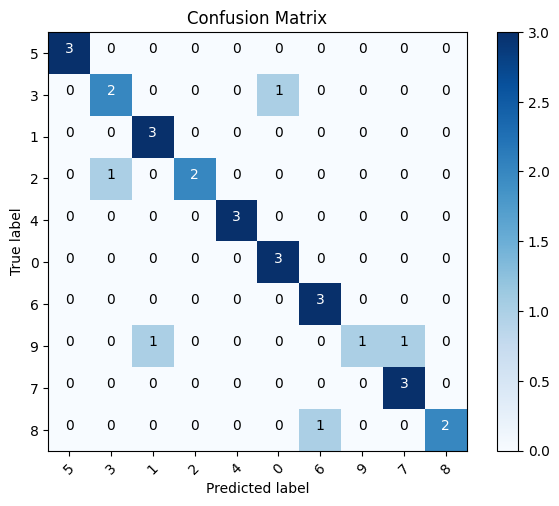

In [18]:
flatScrPredictionsDigits = np.concatenate(scrPredictions)
testLabelsDigits = np.array(testLabelsDigits)

evaluationDigits = EvaluationFS(flatScrPredictionsDigits, testLabelsDigits, digitsNames)
evaluationDigits.report()
evaluationDigits.plot_confusion_matrix()

Accuracy: 1.0000
Class Precision Recall F1-Score
nicolas	1.0000	1.0000	1.0000
yweweler	1.0000	1.0000	1.0000
lucas	1.0000	1.0000	1.0000
george	1.0000	1.0000	1.0000
jackson	1.0000	1.0000	1.0000
theo	1.0000	1.0000	1.0000


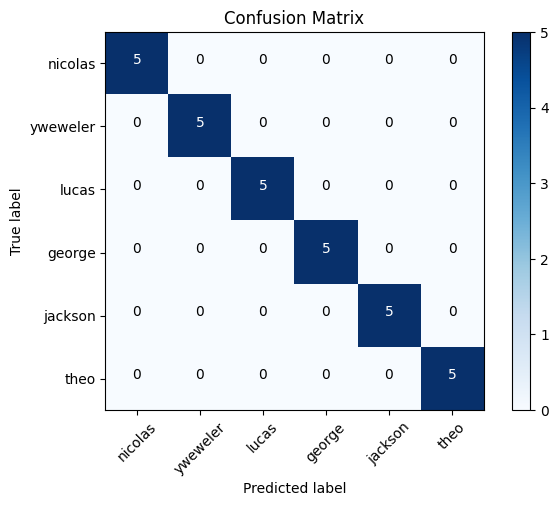

In [19]:
flatScrPredictions_speaker = np.concatenate(scrPredictions_speaker)
testLabelsSpeaker = np.array(testLabelsSpeaker)

evaluationSpeaker = EvaluationFS(flatScrPredictions_speaker, testLabelsSpeaker, speakerNames)
evaluationSpeaker.report()
evaluationSpeaker.plot_confusion_matrix()

<div align="justify">

### <font size="5" color="#A9CCE3">Section 5: Differences Between Implementations</font>

- The first and second implementations, despite both employing the Gaussian Hidden Markov Model (HMM), exhibit noticeable differences in predictive accuracy. The first implementation nearly perfectly predicts all test data, while the second shows several mispredictions among the digits. These discrepancies may be attributed to various factors:

  - **1. Library Differences:** The `hmmlearn` library possibly incorporates additional preprocessing steps on the dataset that were not manually executed at the onset of the project.

  - **2. Model Updating Variations:** There's a possibility that `hmmlearn` follows a distinct methodology for updating model parameters compared to our custom implementation.

  - **3. Convergence Assurance:** In the second part, unlike the first, we do not ensure that the model has converged, opting instead to iterate a fixed number of times (30). This might suggest that the model has not fully converged.

- A significant difference between the two implementations is their approach to segmentation. The second implementation utilizes segmentation, which markedly improves its results. In contrast, the first implementation does not incorporate segmentation and relies entirely on trimming. It's noteworthy that the dataset in the second implementation was not trimmed.

</div>
